In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Output dataframes instead of arrays
set_config(transform_output="pandas") #what does this do?

sacramento = pd.read_csv("../01_materials/notebooks/dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


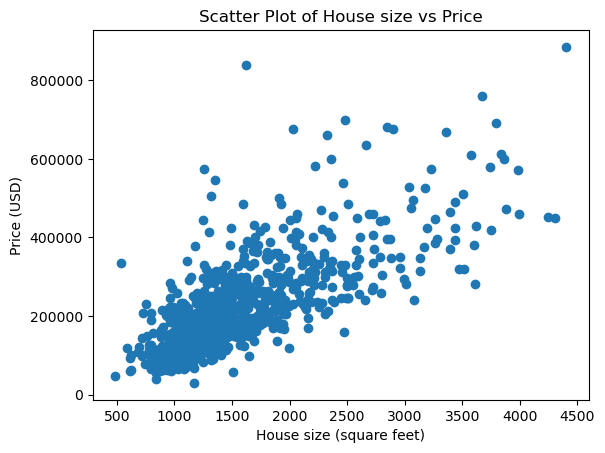

In [8]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [10]:
np.random.seed(10)
small_sacramento = sacramento.sample(n = 30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


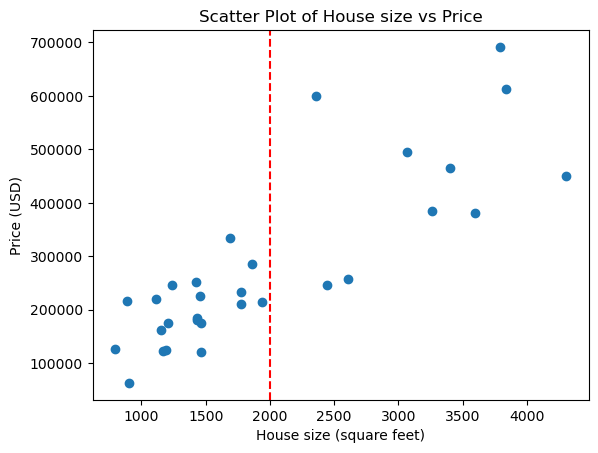

In [12]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [13]:
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()

In [14]:
nearest_neighbors = small_sacramento.nsmallest(5, "dist")
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


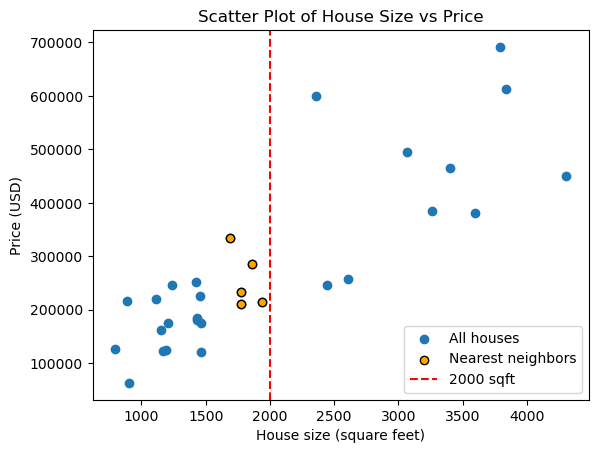

In [15]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [16]:
prediction = nearest_neighbors["price"].mean()
prediction

255630.0

In [18]:
sacramento_train, sacramento_test = train_test_split(
  sacramento,
  train_size = 0.75,
  random_state = 42)

In [19]:
X_train = sacramento_train[["sq__ft"]]  #double bracket for df
y_train = sacramento_train["price"]     #single bracket for vector

In [20]:
knn_regressor = KNeighborsRegressor()

In [21]:
param_grid = {
  "n_neighbors" : range(1, 201, 3)
}

In [60]:
sacr_gridsearch = GridSearchCV(
  estimator = knn_regressor,
  param_grid = param_grid,
  cv = 5,
  scoring = "neg_root_mean_squared_error" 
)

# By defualt, GridSearchCV maximizes, but for RMSE, we want minimum values, hence use neg scoring
# can also use r-squared or coefficient of fit

In [61]:
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)},
             scoring='neg_root_mean_squared_error')

In [62]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007499,0.002086,0.005983,0.001987,1,{'n_neighbors': 1},-110548.799693,-126890.775887,-110650.415962,-121560.153426,-112942.528066,-116518.534607,6570.565937,67
1,0.006316,0.000692,0.007103,0.001771,4,{'n_neighbors': 4},-85755.162528,-96419.621203,-102354.681148,-90468.329464,-97371.520858,-94473.863040,5768.010533,53
2,0.006918,0.002635,0.006623,0.002037,7,{'n_neighbors': 7},-82439.965936,-94498.611302,-97328.609018,-88037.885222,-89632.782566,-90387.570809,5183.315854,32
3,0.007635,0.001793,0.007173,0.001636,10,{'n_neighbors': 10},-79311.613337,-95070.355375,-95634.044309,-84569.282198,-88290.116661,-88575.082376,6228.274465,20
4,0.006449,0.001303,0.007063,0.000918,13,{'n_neighbors': 13},-77015.879617,-93000.141421,-96169.291640,-84608.503221,-84695.611521,-87097.885484,6793.258737,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.005091,0.000773,0.010028,0.000699,187,{'n_neighbors': 187},-89370.092885,-103896.269570,-110891.217027,-98260.030505,-78535.795263,-96190.681050,11295.835292,62
63,0.004038,0.000259,0.008397,0.000692,190,{'n_neighbors': 190},-89810.079082,-104229.910597,-111093.980285,-98692.336886,-78649.702985,-96495.201967,11321.926954,63
64,0.004416,0.000606,0.009165,0.000409,193,{'n_neighbors': 193},-90268.658722,-104458.317634,-111377.876996,-99074.840829,-78680.252863,-96771.989409,11378.215675,64
65,0.004635,0.000733,0.009575,0.000922,196,{'n_neighbors': 196},-90615.971422,-104555.829780,-111721.464835,-99505.296819,-78757.771101,-97031.266791,11433.446119,65


In [63]:
results["mean_test_score"] = results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007499,0.002086,0.005983,0.001987,1,{'n_neighbors': 1},-110548.799693,-126890.775887,-110650.415962,-121560.153426,-112942.528066,116518.534607,6570.565937,67
1,0.006316,0.000692,0.007103,0.001771,4,{'n_neighbors': 4},-85755.162528,-96419.621203,-102354.681148,-90468.329464,-97371.520858,94473.863040,5768.010533,53
2,0.006918,0.002635,0.006623,0.002037,7,{'n_neighbors': 7},-82439.965936,-94498.611302,-97328.609018,-88037.885222,-89632.782566,90387.570809,5183.315854,32
3,0.007635,0.001793,0.007173,0.001636,10,{'n_neighbors': 10},-79311.613337,-95070.355375,-95634.044309,-84569.282198,-88290.116661,88575.082376,6228.274465,20
4,0.006449,0.001303,0.007063,0.000918,13,{'n_neighbors': 13},-77015.879617,-93000.141421,-96169.291640,-84608.503221,-84695.611521,87097.885484,6793.258737,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.005091,0.000773,0.010028,0.000699,187,{'n_neighbors': 187},-89370.092885,-103896.269570,-110891.217027,-98260.030505,-78535.795263,96190.681050,11295.835292,62
63,0.004038,0.000259,0.008397,0.000692,190,{'n_neighbors': 190},-89810.079082,-104229.910597,-111093.980285,-98692.336886,-78649.702985,96495.201967,11321.926954,63
64,0.004416,0.000606,0.009165,0.000409,193,{'n_neighbors': 193},-90268.658722,-104458.317634,-111377.876996,-99074.840829,-78680.252863,96771.989409,11378.215675,64
65,0.004635,0.000733,0.009575,0.000922,196,{'n_neighbors': 196},-90615.971422,-104555.829780,-111721.464835,-99505.296819,-78757.771101,97031.266791,11433.446119,65


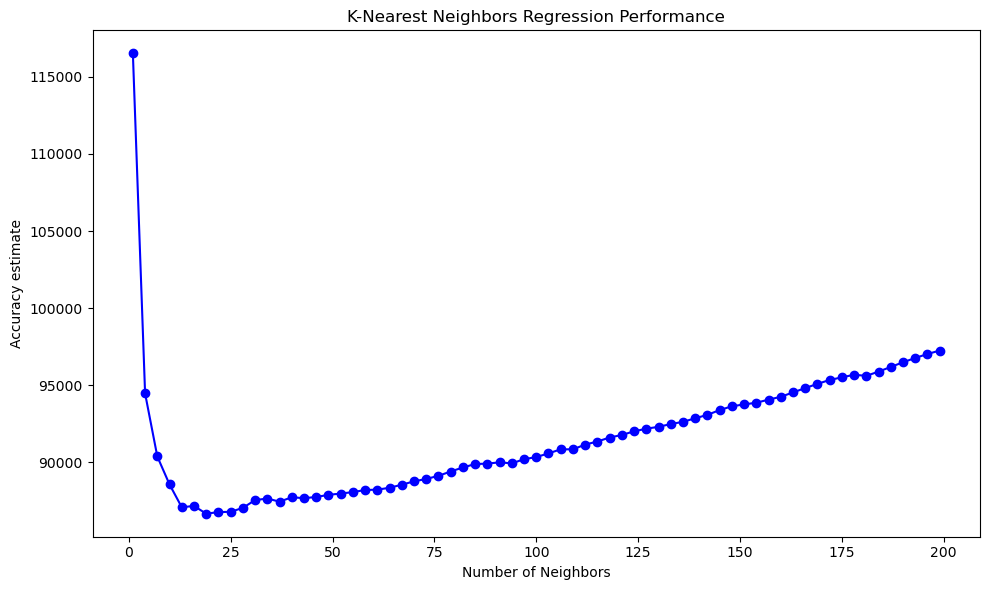

In [64]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [65]:
sacr_gridsearch.best_params_

{'n_neighbors': 19}

In [66]:
sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

#will automatically use best value k

rmspe = mean_squared_error(
  y_true = sacramento_test["price"],
  y_pred = sacramento_test["predicted"]
)**(1/2)

rmspe  # this is the variation of +/- the predicted price can be ~$74000

74275.91009698054

In [67]:
r2 = r2_score(
  y_true = sacramento_test["price"],
  y_pred = sacramento_test["predicted"]
)
r2 #how much variance in response variable is being explained by predictor
# in this case 50% of the price is being explained by the sq_ft

0.4947825543813984

In [68]:
sacr_gridsearch = GridSearchCV(
  estimator = knn_regressor,
  param_grid = param_grid,
  cv = 5,
  scoring = "r2" #can also use r2 for scoring
)

In [69]:
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)}, scoring='r2')

In [70]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007499,0.002086,0.005983,0.001987,1,{'n_neighbors': 1},-110548.799693,-126890.775887,-110650.415962,-121560.153426,-112942.528066,116518.534607,6570.565937,67
1,0.006316,0.000692,0.007103,0.001771,4,{'n_neighbors': 4},-85755.162528,-96419.621203,-102354.681148,-90468.329464,-97371.520858,94473.863040,5768.010533,53
2,0.006918,0.002635,0.006623,0.002037,7,{'n_neighbors': 7},-82439.965936,-94498.611302,-97328.609018,-88037.885222,-89632.782566,90387.570809,5183.315854,32
3,0.007635,0.001793,0.007173,0.001636,10,{'n_neighbors': 10},-79311.613337,-95070.355375,-95634.044309,-84569.282198,-88290.116661,88575.082376,6228.274465,20
4,0.006449,0.001303,0.007063,0.000918,13,{'n_neighbors': 13},-77015.879617,-93000.141421,-96169.291640,-84608.503221,-84695.611521,87097.885484,6793.258737,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.005091,0.000773,0.010028,0.000699,187,{'n_neighbors': 187},-89370.092885,-103896.269570,-110891.217027,-98260.030505,-78535.795263,96190.681050,11295.835292,62
63,0.004038,0.000259,0.008397,0.000692,190,{'n_neighbors': 190},-89810.079082,-104229.910597,-111093.980285,-98692.336886,-78649.702985,96495.201967,11321.926954,63
64,0.004416,0.000606,0.009165,0.000409,193,{'n_neighbors': 193},-90268.658722,-104458.317634,-111377.876996,-99074.840829,-78680.252863,96771.989409,11378.215675,64
65,0.004635,0.000733,0.009575,0.000922,196,{'n_neighbors': 196},-90615.971422,-104555.829780,-111721.464835,-99505.296819,-78757.771101,97031.266791,11433.446119,65


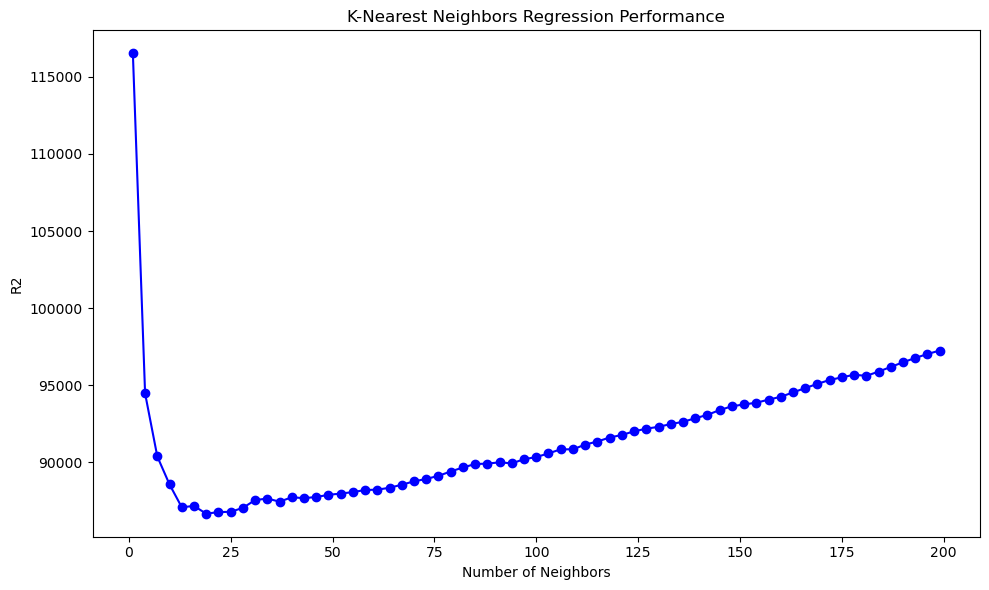

In [71]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('R2')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [72]:
sacr_gridsearch.best_params_

{'n_neighbors': 25}